<a href="https://colab.research.google.com/github/edisto36/PortafolioProjects/blob/main/AutoML_Prediccion_Benchmark_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Common Libraries
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [12]:
# Framework library
from sklearn.linear_model import LinearRegression

In [13]:
import pandas as pd

data = pd.read_csv('/content/diamantes.csv')
display(data.head())

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [14]:
# Role definition
target = data['price']
data = data.drop(['price'], axis=1)

In [15]:
# Pre-processing
data = pd.get_dummies(data)
data

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,3.89,3.84,2.31,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,4.05,4.07,2.31,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,4.20,4.23,2.63,False,False,False,True,...,True,False,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,4.34,4.35,2.75,False,True,False,False,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
53936,0.72,63.1,55.0,5.69,5.75,3.61,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
53937,0.70,62.8,60.0,5.66,5.68,3.56,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
53938,0.86,61.0,58.0,6.15,6.12,3.74,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False


In [16]:
# Divide the data into train and test
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=25)

In [17]:
# Set up the framework
modelo = LinearRegression()

In [18]:
# Fit the model
modelo.fit(X_train, y_train)

LinearRegression()

In [20]:
# Get predictions for both train and test datasets
train_predictions = modelo.predict(X_train)
test_predictions = modelo.predict(X_test)

In [22]:
# Evaluate the quality of the predictions
print("Train R2 Score:", r2_score(y_train, train_predictions))
print("Train RMSE Score:", mean_squared_error(y_train, train_predictions)**0.5)
print("Test R2 Score:", r2_score(y_test, test_predictions))
print("Test RMSE Score:", mean_squared_error(y_test, test_predictions)**0.5)

Train R2 Score: 0.9192517774874324
Train RMSE Score: 1130.8142056181423
Test R2 Score: 0.9218201918911629
Test RMSE Score: 1126.396803384516


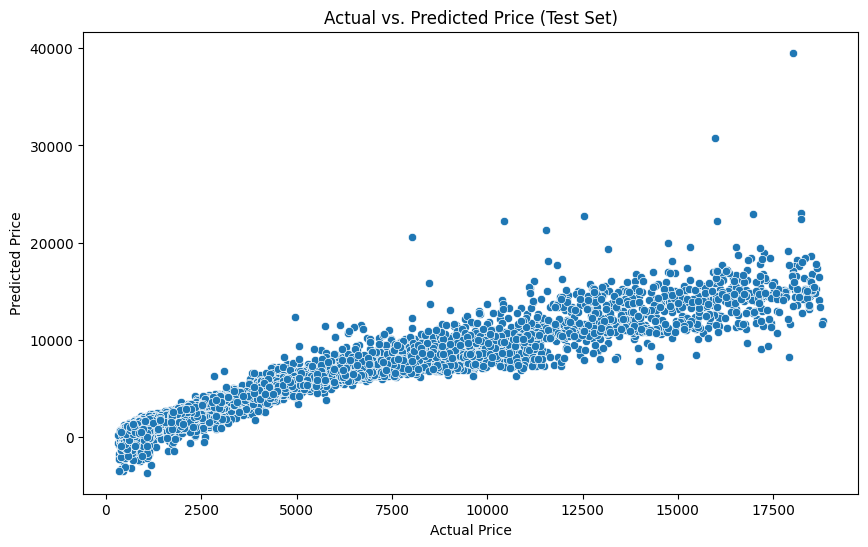

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=test_predictions)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Price (Test Set)")
plt.show()